In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-rc0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-rc0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape) # x
print(housing.target.shape) # y

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 划分样本
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7 # 随机种子
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11
)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [10]:
# 函数式api
# 取前五个特征做wide输入
# 取后六个特征做deep输入
# 多输出适用于 多任务学习
input_deep = keras.layers.Input(shape=[6])
input_wide = keras.layers.Input(shape=[5])
hidden1 = keras.layers.Dense(30,activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)

concat = keras.layers.concatenate([input_wide,hidden2])

output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)


model = keras.models.Model(inputs=[input_deep,input_wide],
                           outputs=[output, output2])


model.summary()

model.compile(loss = "mean_squared_error",               # 损失函数
              optimizer = "adam",                       # 模型的求解方法
              metrics = ["accuracy"],                   # 增加 accuracy 指标
              )


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           210         input_5[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
____________________________________________________________________________________________

In [11]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

x_train_scaled_wide = x_train_scaled[:,:5]
x_train_scaled_deep = x_train_scaled[:,2:]
x_valid_scaled_wide = x_valid_scaled[:,:5]
x_valid_scaled_deep = x_valid_scaled[:,2:]
x_test_scaled_wide = x_test_scaled[:,:5]
x_test_scaled_deep = x_test_scaled[:,2:]

# epochs 训练集遍历次数
history = model.fit([x_train_scaled_deep,x_train_scaled_wide],[y_train,y_train],epochs=100,
          validation_data=([x_valid_scaled_deep,x_valid_scaled_wide],[y_valid,y_valid]),
          callbacks=callbacks
          )

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 205us/sample - loss: 3.7763 - dense_8_loss: 1.9519 - dense_9_loss: 1.8232 - dense_8_accuracy: 0.0027 - dense_9_accuracy: 0.0028 - val_loss: 1.8890 - val_dense_8_loss: 0.9115 - val_dense_9_loss: 0.9774 - val_dense_8_accuracy: 0.0023 - val_dense_9_accuracy: 0.0023
Epoch 2/100
11610/11610 [==============================] - 2s 137us/sample - loss: 1.3981 - dense_8_loss: 0.6587 - dense_9_loss: 0.7394 - dense_8_accuracy: 0.0030 - dense_9_accuracy: 0.0030 - val_loss: 1.2525 - val_dense_8_loss: 0.5760 - val_dense_9_loss: 0.6764 - val_dense_8_accuracy: 0.0023 - val_dense_9_accuracy: 0.0023
Epoch 3/100
11610/11610 [==============================] - 2s 139us/sample - loss: 1.0984 - dense_8_loss: 0.4973 - dense_9_loss: 0.6011 - dense_8_accuracy: 0.0028 - dense_9_accuracy: 0.0028 - val_loss: 1.0880 - val_dense_8_loss: 0.4875 - val_dense_9_loss: 0.6004 - val_dense_8_accuracy: 0.0023 - val_d

Epoch 24/100
11610/11610 [==============================] - 1s 126us/sample - loss: 0.6895 - dense_8_loss: 0.3176 - dense_9_loss: 0.3721 - dense_8_accuracy: 0.0031 - dense_9_accuracy: 0.0030 - val_loss: 0.7057 - val_dense_8_loss: 0.3239 - val_dense_9_loss: 0.3817 - val_dense_8_accuracy: 0.0021 - val_dense_9_accuracy: 0.0023
Epoch 25/100
11610/11610 [==============================] - 1s 121us/sample - loss: 0.6969 - dense_8_loss: 0.3205 - dense_9_loss: 0.3763 - dense_8_accuracy: 0.0030 - dense_9_accuracy: 0.0028 - val_loss: 0.7077 - val_dense_8_loss: 0.3244 - val_dense_9_loss: 0.3831 - val_dense_8_accuracy: 0.0021 - val_dense_9_accuracy: 0.0023
Epoch 26/100
11610/11610 [==============================] - 1s 119us/sample - loss: 0.6823 - dense_8_loss: 0.3136 - dense_9_loss: 0.3685 - dense_8_accuracy: 0.0031 - dense_9_accuracy: 0.0031 - val_loss: 0.7212 - val_dense_8_loss: 0.3268 - val_dense_9_loss: 0.3943 - val_dense_8_accuracy: 0.0021 - val_dense_9_accuracy: 0.0023
Epoch 27/100
11610/116

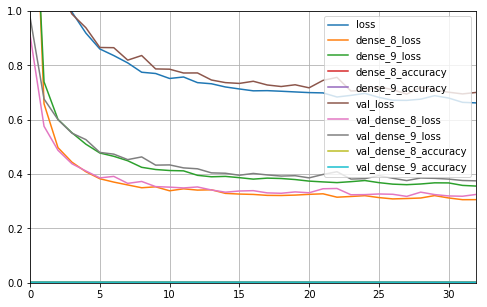

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [13]:
model.evaluate([x_test_scaled_deep,x_test_scaled_wide],[y_test,y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6929273784622666, 0.32699245, 0.3675851, 0.0032945736, 0.0032945736]